In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation, ensemble, preprocessing, decomposition, linear_model, metrics
df = pd.read_csv('toRF.csv', delimiter=' ')
%matplotlib inline

In [209]:
df = df.drop(['action_type', 'rate_spread'],1)

In [210]:
numeric_data_columns = ['loan_amount_ink',\
                        'applicant_income_ink',\
                        'minority_population_pct',\
                        'hud_median_family_income',\
                        'tract_to_msamd_income_pct',\
                        'number_of_owner_occupied_units']

In [211]:
categoric_data_columns = ['loan_type',\
                          'loan_purpose',\
                          'preapproval',\
                          'county_code',\
                          'applicant_ethnicity',\
                          'co_applicant_ethnicity',\
                          'applicant_race_1',\
                          'applicant_sex',
                          'hoepa_status',
                          'lien_status']

In [212]:
for col in categoric_data_columns:
    df[col] = preprocessing.LabelEncoder().fit_transform(df[col])

for col in numeric_data_columns:
    df[col] = preprocessing.StandardScaler().fit_transform(np.array(df[col]).reshape(-1, 1))

/home/slavoshevskiy-me/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/slavoshevskiy-me/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [213]:
X,y = df.drop('target', axis=1), df.target
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.1)
# RandomForest
model1 = ensemble.RandomForestClassifier(max_depth=4)
model1.fit(X_train, y_train)
print model1.score(X_test, y_test)
# SGDClassifier
model2 = linear_model.SGDClassifier()
model2.fit(X_train, y_train)
print model2.score(X_test, y_test)

0.836734693878
0.329081632653


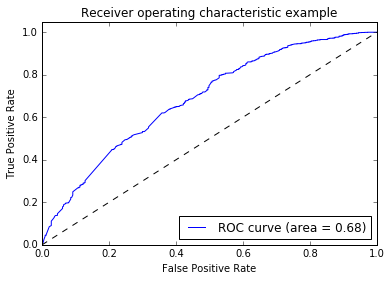

In [221]:
y_score = model1.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test, y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
plt.figure()
plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [223]:
X,y = df.drop([u'applicant_ethnicity', u'applicant_race_1', u'applicant_sex', 'target'], axis=1), df.target
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.1)
# RandomForest
model1 = ensemble.RandomForestClassifier(max_depth=4)
model1.fit(X_train, y_train)
print model1.score(X_test, y_test)
# SGDClassifier
model2 = linear_model.SGDClassifier()
model2.fit(X_train, y_train)
print model2.score(X_test, y_test)

0.829081632653
0.832142857143


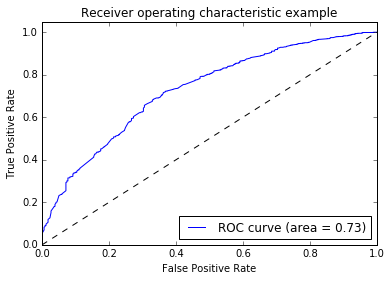

In [224]:
y_score = model1.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test, y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
plt.figure()
plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()